Data Shape: (60, 6)


,time,temperature,humidity,weight,stage_label,session_id
0,0.000000,40.333062,41.479065,1000.000000,0.0,101
1,1.016949,43.967572,41.090170,997.966102,0.0,101
2,2.033898,50.950021,42.471358,995.932203,0.0,101
3,3.050847,57.133780,42.601442,993.898305,0.0,101
4,4.067797,59.153633,42.080717,991.864407,0.0,101


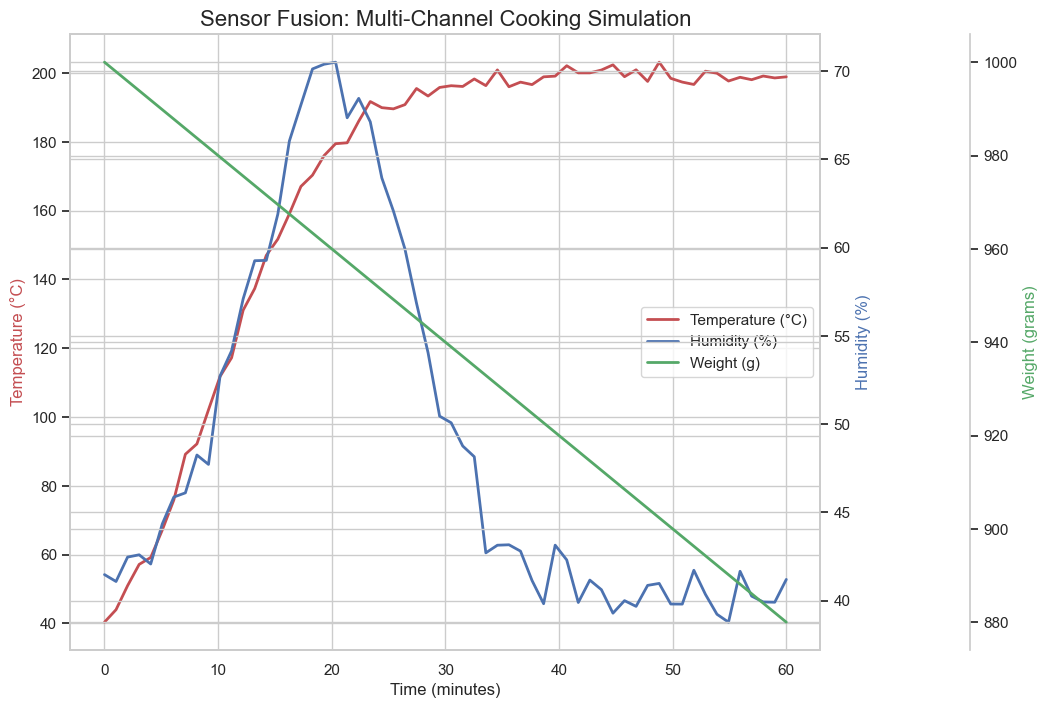

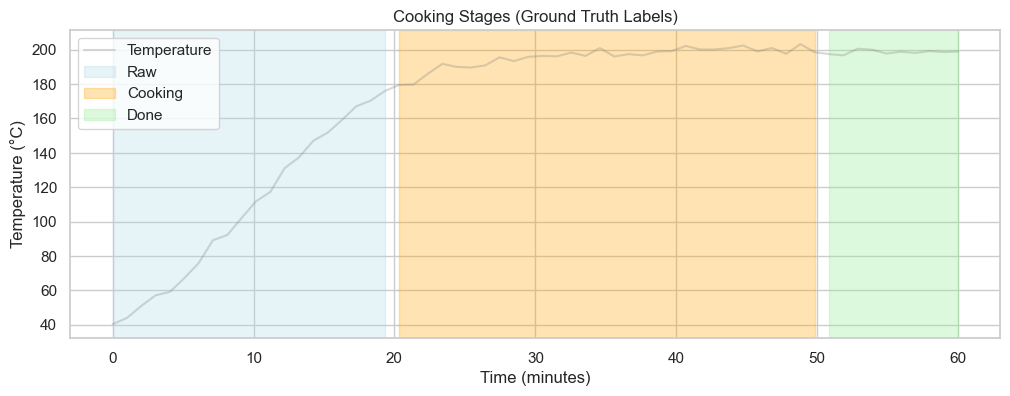

In [1]:
# 1_exploration.ipynb

# %% [markdown]
# # Step 1: Data Exploration & Sensor Fusion Visualization
# This notebook validates our synthetic data generator. 
# We simulate a "Sensor Fusion" cooking session (Temperature + Humidity + Weight) 
# to ensure the physics look realistic before training our AI models.

# %%
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Add the 'src' directory to the path so we can import our modules
sys.path.append(os.path.abspath('../src'))

from smartcook.data_gen import generate_cooking_session

# Set plot style for professional "Report-Ready" graphs
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# %% [markdown]
# ### 1. Generate a Single Cooking Session
# We simulate 60 minutes of roasting a chicken.

# %%
# Generate Session ID #101
df = generate_cooking_session(session_id=101, food_type="chicken")

# Display the first 5 rows (The "Head")
print("Data Shape:", df.shape)
display(df.head())

# %% [markdown]
# ### 2. Visualize Sensor Fusion (The "Bosch" Plot)
# We need to plot 3 different sensors with different scales on one timeline.
# - **Temperature (Red):** Should rise logistically.
# - **Humidity (Blue):** Should rise as food sweats, then fall.
# - **Weight (Green):** Should decrease linearly (moisture loss).

# %%
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75) # Make room for the 3rd y-axis

# Create twin axes
par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2. The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))

# Plot the curves
p1, = host.plot(df['time'], df['temperature'], "r-", label="Temperature (°C)", linewidth=2)
p2, = par1.plot(df['time'], df['humidity'], "b-", label="Humidity (%)", linewidth=2)
p3, = par2.plot(df['time'], df['weight'], "g-", label="Weight (g)", linewidth=2)

# Set labels
host.set_xlabel("Time (minutes)")
host.set_ylabel("Temperature (°C)")
par1.set_ylabel("Humidity (%)")
par2.set_ylabel("Weight (grams)")

# Set colors for axis labels to match lines
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Set Title
plt.title("Sensor Fusion: Multi-Channel Cooking Simulation", fontsize=16)

# Add a legend
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc='center right')

plt.show()

# %% [markdown]
# ### 3. Visualize Cooking Stages (Ground Truth)
# We also generated labels (Raw, Cooking, Done). Let's visualize where they switch.
# This validates that our "Downstream Task" has good data to learn from.

# %%
plt.figure(figsize=(12, 4))

# Plot Temperature again as context
plt.plot(df['time'], df['temperature'], color='grey', alpha=0.3, label='Temperature')

# Shade the background based on Stage
# Stage 0 = Raw (Blue), 1 = Cooking (Orange), 2 = Done (Green)
stages = df['stage_label'].unique()
colors = ['lightblue', 'orange', 'lightgreen']
labels = ['Raw', 'Cooking', 'Done']

for stage_id, color, label in zip(stages, colors, labels):
    subset = df[df['stage_label'] == stage_id]
    if not subset.empty:
        plt.axvspan(subset['time'].min(), subset['time'].max(), color=color, alpha=0.3, label=label)

plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Cooking Stages (Ground Truth Labels)")
plt.legend(loc='upper left')
plt.show()

# %%